In [17]:
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import random
import sys

#### 6.2 探究掷骰子样本空间马尔可夫链性质
构建马尔可夫模型，直方图和相关图绘制，可以看出序列生成是强相关的。

[[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]]
974685 us


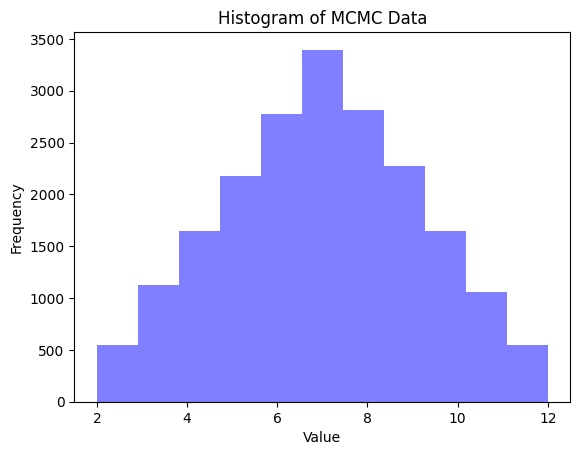

C:\Users\Nemo\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:2116: RuntimeWarning: overflow encountered in scalar multiply
  correls = correls / np.sqrt(np.dot(x, x) * np.dot(y, y))


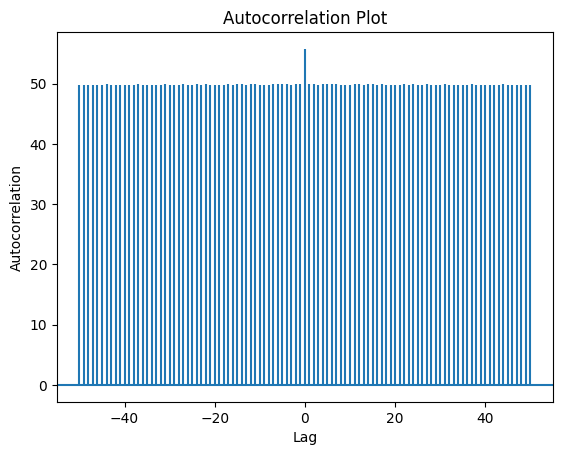

In [2]:
num=np.arange(2,13,1)

P0=np.array([1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36])
P=np.array([1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36])
for t in range(len(P)):
    if t==0:
        pass
    else:
        P[t]+=P[t-1]
Trans_matrix=np.zeros((11,11))
for t in range(11):
    if t==0:
        Trans_matrix[t][t]=0.5
        Trans_matrix[t][t+1]=0.5
    elif t<10:
        Trans_matrix[t][t-1]=0.5
        Trans_matrix[t][t+1]=0.5
    else:
        Trans_matrix[t][t]=0.5
        Trans_matrix[t][t-1]=0.5
print(Trans_matrix)
Pout=np.dot(P0,Trans_matrix)
P_matrix=np.transpose(Pout.reshape(-1,1))*P0
num_matrix=np.transpose(num.reshape(-1,1))*num
E_XY=np.sum(P_matrix*num_matrix)
E_X=np.sum(num*P0)
E_Y=np.sum(num*Pout)
def Simulate_MCMC(num,P):
    data=[]
    for t in range(num):
        U=random.uniform(0,1)
        index=0
        while(index<=11 and P[index]<U):
            index+=1
        data.append(index+2)
    return np.array(data)
start_dt=datetime.datetime.now()
data=Simulate_MCMC(20000,P)
end_dt=datetime.datetime.now()
print((start_dt-end_dt).microseconds,"us")
# 绘制直方图
plt.hist(data, bins=11, density=False, alpha=0.5, color='b')

# 设置标题和坐标轴标签
plt.title('Histogram of MCMC Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()
plt.acorr(data,maxlags=50)  # maxlags 参数表示要显示的最大滞后值
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

        


均匀分布邻域重复上述操作

[[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]]
980781 us


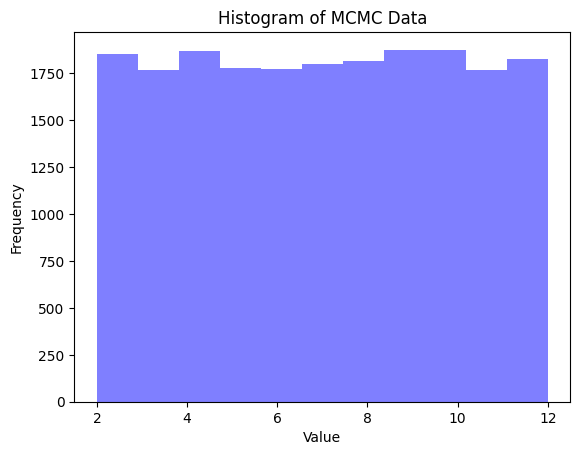

C:\Users\Nemo\AppData\Roaming\Python\Python311\site-packages\matplotlib\axes\_axes.py:2116: RuntimeWarning: overflow encountered in scalar multiply
  correls = correls / np.sqrt(np.dot(x, x) * np.dot(y, y))


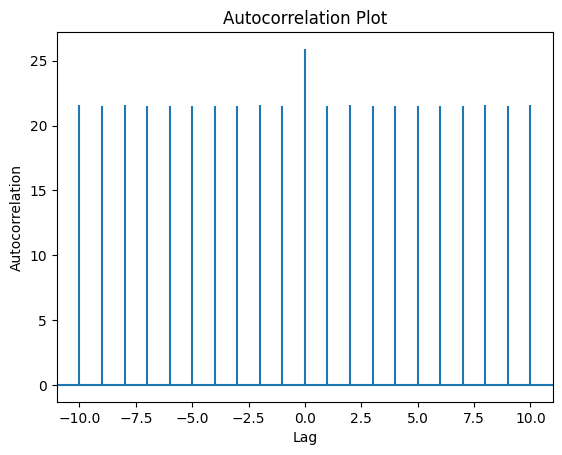

In [7]:
num=np.arange(2,13,1)

P0=np.array([1/11]*11)
P=np.array([1/11]*11)
for t in range(len(P)):
    if t==0:
        pass
    else:
        P[t]+=P[t-1]
Trans_matrix=np.zeros((11,11))
for t in range(11):
    if t==0:
        Trans_matrix[t][t]=0.5
        Trans_matrix[t][t+1]=0.5
    elif t<10:
        Trans_matrix[t][t-1]=0.5
        Trans_matrix[t][t+1]=0.5
    else:
        Trans_matrix[t][t]=0.5
        Trans_matrix[t][t-1]=0.5
print(Trans_matrix)

def Simulate_MCMC(num,P):
    data=[]
    for t in range(num):
        U=random.uniform(0,1)
        index=0
        while(index<=11 and P[index]<U):
            index+=1
        data.append(index+2)
    return np.array(data)
start_dt=datetime.datetime.now()
data=Simulate_MCMC(20000,P)
end_dt=datetime.datetime.now()
print((start_dt-end_dt).microseconds,"us")
# 绘制直方图
plt.hist(data, bins=11, density=False, alpha=0.5, color='b')

# 设置标题和坐标轴标签
plt.title('Histogram of MCMC Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()
plt.acorr(data)  # maxlags 参数表示要显示的最大滞后值
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

        


#### 6.3 探究MCMC的收敛速度

[[0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]]
998656 us


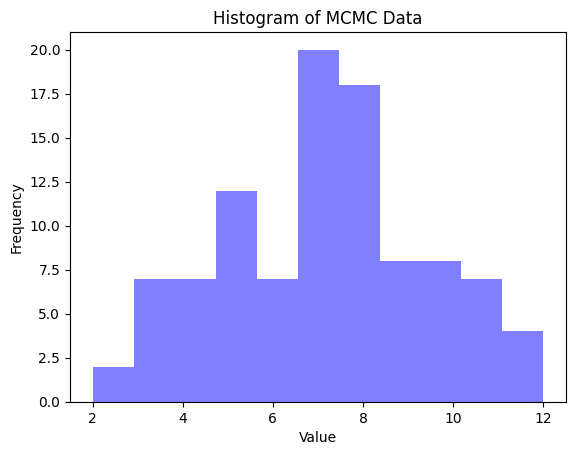

In [9]:
num=np.arange(2,13,1)

P0=np.array([1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36])
P=np.array([1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36])
for t in range(P.shape[0]):
    if t==0:
        pass
    else:
        P[t]+=P[t-1]
Trans_matrix=np.zeros((11,11))
for t in range(11):
    if t==0:
        Trans_matrix[t][t]=0.5
        Trans_matrix[t][t+1]=0.5
    elif t<10:
        Trans_matrix[t][t-1]=0.5
        Trans_matrix[t][t+1]=0.5
    else:
        Trans_matrix[t][t]=0.5
        Trans_matrix[t][t-1]=0.5
print(Trans_matrix)
Pout=np.dot(P0,Trans_matrix)
P_matrix=np.transpose(Pout.reshape(-1,1))*P0
num_matrix=np.transpose(num.reshape(-1,1))*num
E_XY=np.sum(P_matrix*num_matrix)
E_X=np.sum(num*P0)
E_Y=np.sum(num*Pout)
def Simulate_MCMC(num,P):
    data=[]
    for t in range(num):
        U=random.uniform(0,1)
        index=0
        while(index<=11 and P[index]<U):
            index+=1
        data.append(index+2)
    return np.array(data)
start_dt=datetime.datetime.now()
data=Simulate_MCMC(100,P)
end_dt=datetime.datetime.now()
print((start_dt-end_dt).microseconds,"us")
# 绘制直方图
plt.hist(data, bins=11, density=False, alpha=0.5, color='b')

# 设置标题和坐标轴标签
plt.title('Histogram of MCMC Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图形
plt.show()

        


In [13]:
def convergence(num):
    data=Simulate_MCMC(num,P)
    aver=np.mean(data)
    var=np.var(data)
    return var,aver


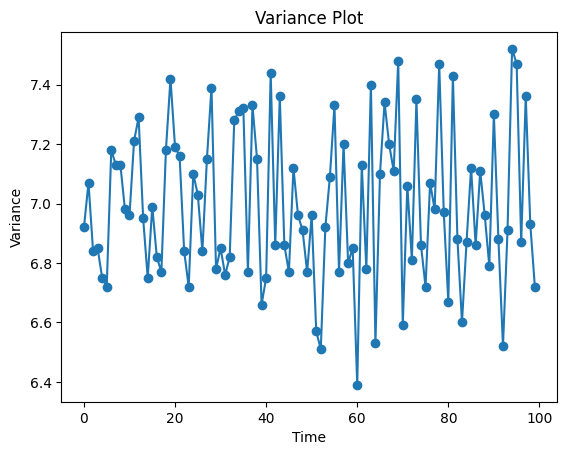

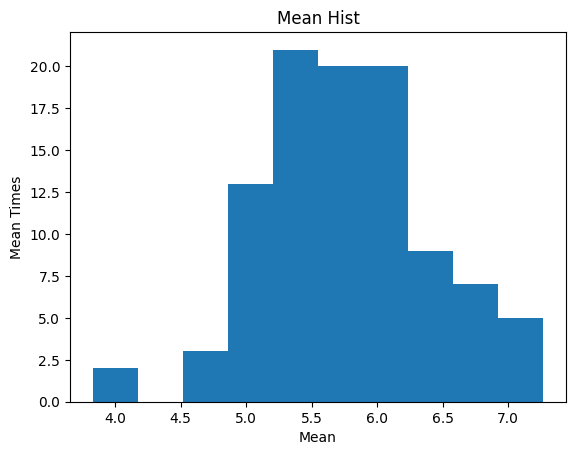

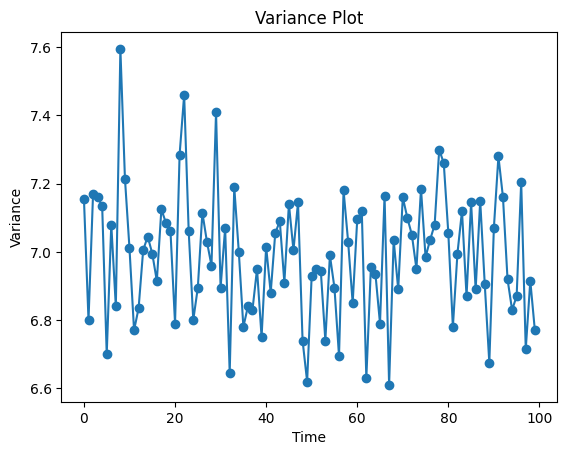

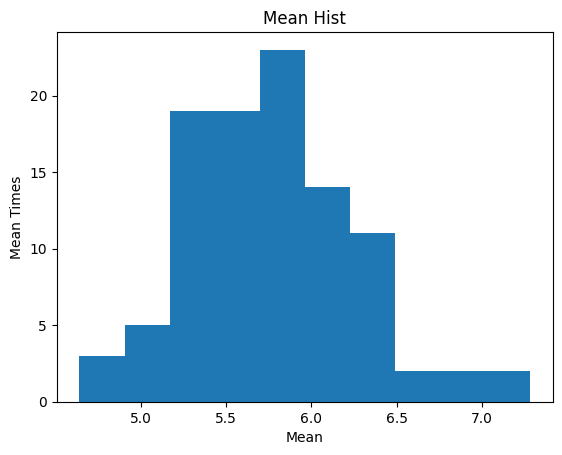

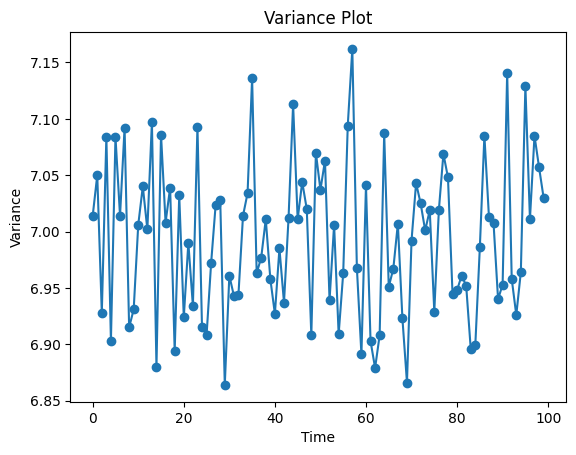

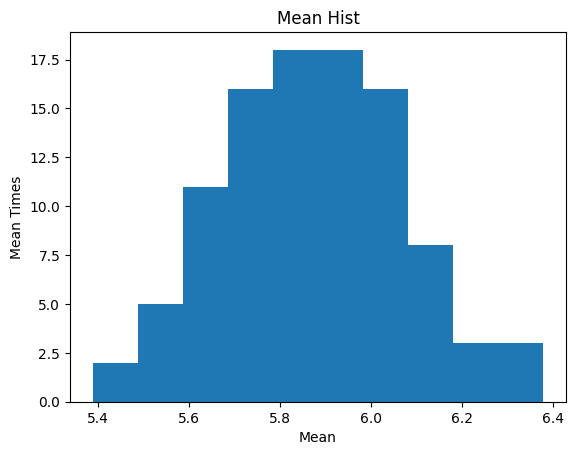

In [14]:
'''
Author: loyunemo
Date: 2023-11-20 13:15:48
LastEditors: loyunemo
LastEditTime: 2023-11-20 21:44:23
FilePath: \undefinedd:\learning\Computer_Simulation\Repo_Computer_Simulation\Hw7\Hw7.ipynb
'''
def Show(num):    
    Lst1=[]
    Lst2=[]
    No=[]
    for t in range(100):
        No.append(t)
        var,aver=convergence(num)
        Lst1.append(aver)
        Lst2.append(var)
    plt.plot(np.array(No), np.array(Lst1), marker='o', linestyle='-')
    plt.title('Variance Plot')
    plt.xlabel('Time')
    plt.ylabel('Variance')
    plt.show()
    plt.hist(Lst2)
    plt.title('Mean Hist')
    plt.xlabel('Mean')
    plt.ylabel('Mean Times')
    plt.show()

Show(100)
Show(200)
Show(1000)

0 us


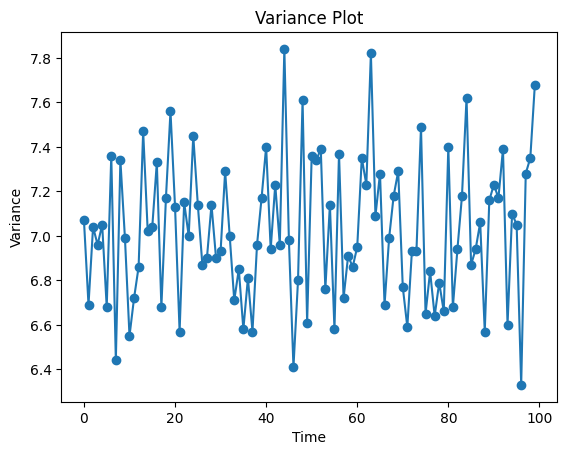

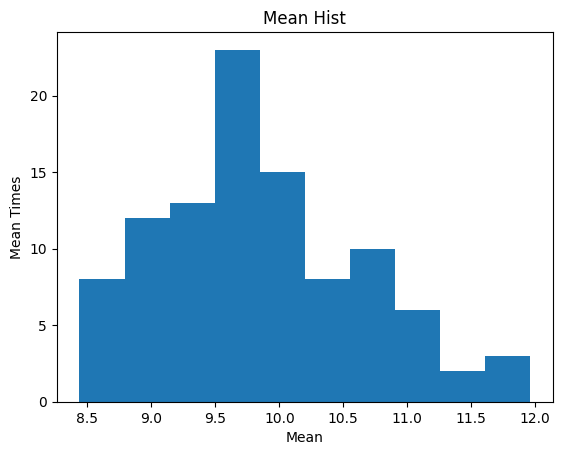

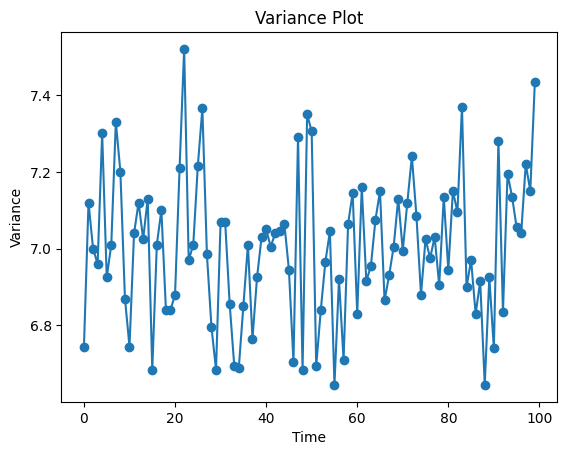

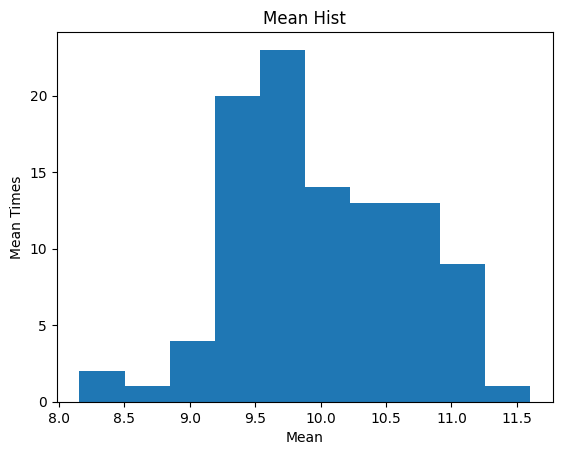

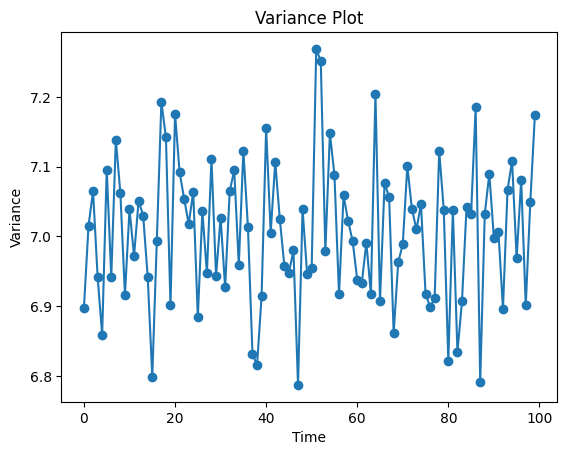

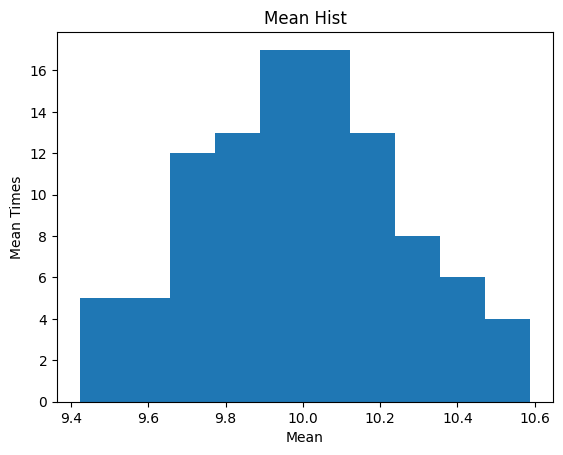

In [18]:
num=np.arange(2,13,1)

P0=np.array([1/11]*11)
P=np.array([1/11]*11)
for t in range(P.shape[0]):
    if t==0:
        pass
    else:
        P[t]+=P[t-1]
def Simulate_MCMC(num,P):
    data=[]
    for t in range(num):
        U=random.uniform(0,1)
        index=0
        while(index<=11 and P[index]<U):
            index+=1
        data.append(index+2)
    return np.array(data)
start_dt=datetime.datetime.now()
data=Simulate_MCMC(100,P)
end_dt=datetime.datetime.now()
print((start_dt-end_dt).microseconds,"us")


Show(100)
Show(200)
Show(1000)


#### 6.4 探究特定密度函数取样性质

先计算c值。
由分部积分法我们可以得到，
$$\int ^{+\infty} _0 cx^2e^{-x}=-cx^2e^{-x}|^{+\infty} _0+\int ^{+\infty} _0 2cxe^{-x}=-2cxe^{-x}|^{+\infty} _0+\int ^{+\infty} _0 2ce^{-x}=2c=1$$

所以c=0.5

采用接受-拒绝抽样法

9223372036854775807
平均值： 2.6625356268676947 方差: 2.387470769496174


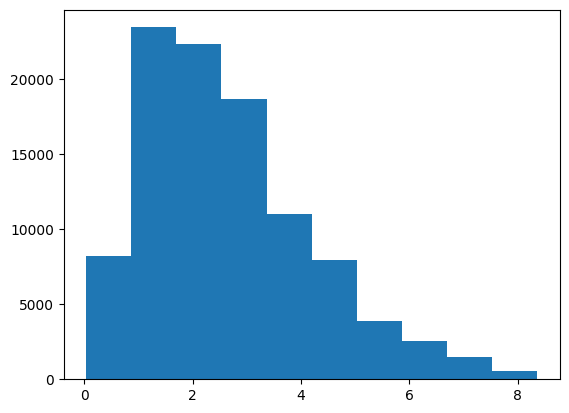

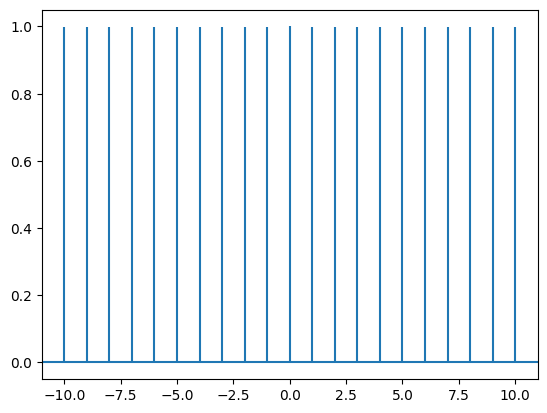

平均值： 3.013047412861138 方差: 3.153530996464343


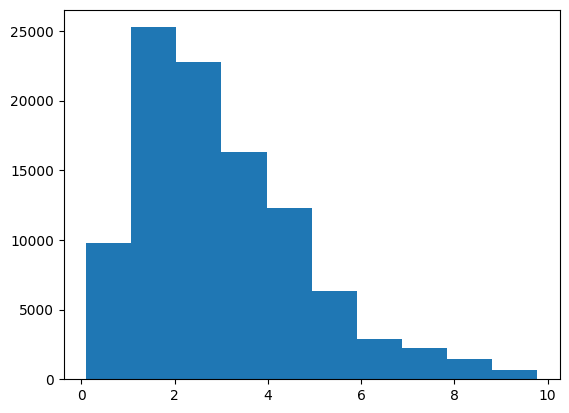

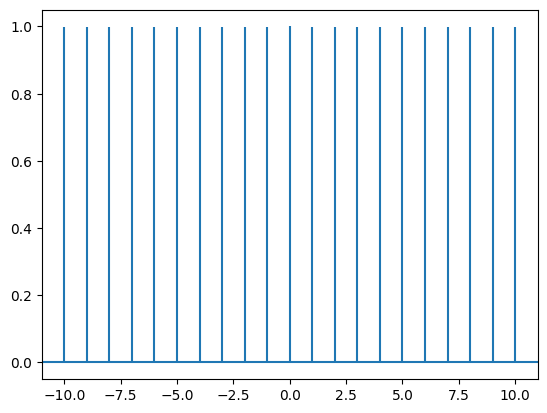

平均值： 3.5789540054542983 方差: 4.505979539360867


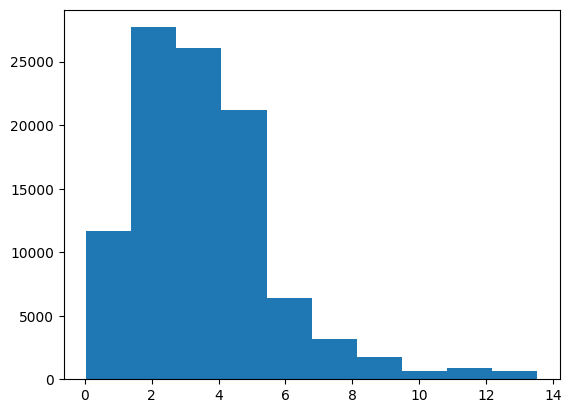

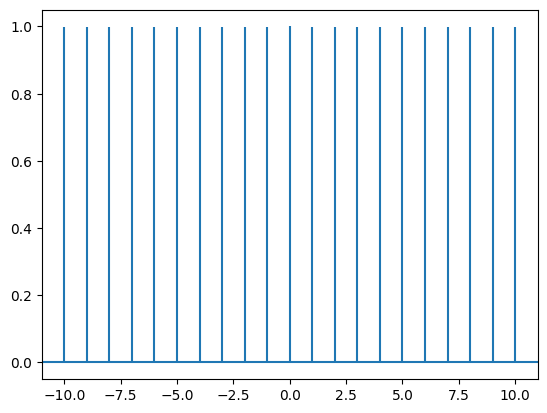

In [27]:
import math
print(sys.maxsize)
data=[]
num=10000
while(len(data)<num):
    y=random.uniform(0,1)
    y=math.sqrt(1/y)-1
    x=random.uniform(0,1)
    if y==0:
        y=random.rand(0,1)
        y=math.sqrt(1/y)-1
    hy=0.5*y*y*math.exp(-y)*(y+1)*(y+1)/(5)
    if x<hy:
        data.append(y)
def f(x):
    return 0.5*x*x*math.exp(-x)
def Metro_Simulate(f,start,times,delta):
    data=[]
    x=start
    for i in range(times):
        y=random.uniform(x-delta,x+delta)
        if y<0:
            y=x
        h=min(1,f(y)/f(x))
        u=random.uniform(0,1)
        if u<h:
            x=y
        data.append(x)
    data=np.array(data)
    print("平均值：",np.mean(data),"方差:",np.var(data))
    plt.hist(data)    
    plt.show()
    plt.acorr(data)
    plt.show()
Metro_Simulate(f,2,100000,0.1)
Metro_Simulate(f,5,100000,0.1)
Metro_Simulate(f,0.2,100000,0.1)